In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from binnings import * 
from calibration_functions import *
from calibration_function_derivates import *
from data_generation import *
from binnings import *
from piecewise_linear import Piecewise_NN4
from scipy.special import softmax
from scipy.special import expit as sigmoid

Instructions for updating:
non-resource variables are not supported in the long term


In [11]:
def get_syn():
    df_all_pw = pd.read_pickle("SYN_DATA.pkl") # CHANGE THIS TO MATCH WITH SYN DATA FILE YOU GET FROM "data_combiner.py"
    
    #df_all_pw = pd.read_pickle(folder_loc + "/mai26_5seeds_01lr.pkl") 
    df_all_other = pd.read_pickle("mai26_5seeds_other_pwlf.pkl") 
    df_all_kce = pd.read_pickle("kce_5seeds.pkl") 
    df_all = pd.concat([df_all_pw, df_all_other, df_all_kce])

    
    df_all = df_all.fillna(9999)
    df_all["ECE_diff_abs"] = np.abs(df_all.c_hat_distance_p_debiased - df_all.p_distance_c)
    df_all["ECE_diff_sq"] = np.abs(df_all.c_hat_distance_p_square_debiased - df_all.p_distance_c_square)


    # Select the methods we want to compare
    df_all = df_all[df_all.binning.isin(
        ['PW_NN4_tr_bs_lr0.01_p20', 
         'PW_NN4_ens_bs_lr0.01_p20',
         #'PW_NN4_tr_ce_lr0.01_p20', 
         'PW_NN4_ens_ce_lr0.01_p20',
         #'PW_NN6_tr_logit_bs_lr0.01_p20', 
         'PW_NN6_ens_logit_bs_lr0.01_p20',
         'PW_NN6_tr_logit_ce_lr0.01_p20', 
         'PW_NN6_ens_logit_ce_lr0.01_p20',
         'eq_size_15',
         'eq_size_CV10tr',
         'monotonic_eq_size',
         'beta', 
         'platt', 
         'isotonic',
         'pwlf_d1tr',
        "KCE",
        # 'pwlf_d2tr'
          #'kde_pointwise', 
        ]
    )]
    
    # Rename methods
    df_all.binning = df_all['binning'].replace({
        "PW_NN4_ens_bs_lr0.01_p20": "$PL_{NN}^{MSE}$",
        "PW_NN4_ens_ce_lr0.01_p20": "$PL_{NN}^{CE}$",
        "PW_NN4_tr_bs_lr0.01_p20": "$PL_{NN}^{MSE}-trick$",
        "PW_NN6_ens_logit_bs_lr0.01_p20": "$PL3^{MSE}$",
        "PW_NN6_ens_logit_ce_lr0.01_p20": "$PL3^{CE}$",
        "PW_NN6_tr_logit_ce_lr0.01_p20": "$PL3^{CE}-trick$",
        "eq_size_15": "$ES_{15}$",
        "eq_size_CV10tr": "$ES_{CV}$",
        "monotonic_eq_size": "$ES_{sweep}$",
        "kde_pointwise": "KDE",
        "beta": "beta",
        "platt": "Platt",
        "isotonic": "isotonic",
        "pwlf_d1tr": "$PL_{DE}$",
        "pwlf_d2tr": "$PL_{pwlf}^2$"
    })

    return df_all

In [12]:
df_all = get_syn()

In [13]:
df_all.binning.unique()

array(['$PL_{NN}^{MSE}-trick$', '$PL_{NN}^{MSE}$', '$PL_{NN}^{CE}$',
       '$PL3^{MSE}$', '$PL3^{CE}-trick$', '$PL3^{CE}$', '$ES_{15}$',
       '$ES_{CV}$', '$ES_{sweep}$', 'beta', 'Platt', 'isotonic',
       '$PL_{DE}$', 'KCE'], dtype=object)

In [10]:
def get_syn_old():
    df_all = pd.read_pickle("SYN_DATA.pkl") # CHANGE THIS TO MATCH WITH SYN DATA FILE YOU GET FROM "data_combiner.py"
    
    df_all = df_all.fillna(9999)
    df_all["ECE_diff_abs"] = np.abs(df_all.c_hat_distance_p_debiased - df_all.p_distance_c)
    df_all["ECE_diff_sq"] = np.abs(df_all.c_hat_distance_p_square_debiased - df_all.p_distance_c_square)

    # Select the methods we want to compare
    df_all = df_all[df_all.binning.isin(
        ['PW_NN4tr_bs_lr0.01_p20_bs',
         'PW_NN6tr_logit_ce_lr0.01_p20',
         'eq_size_15',
         'eq_size_CV10tr',
         'monotonic_eq_size',
         'beta', 
         'platt', 
         'isotonic',
         'pwlf_d1tr',
         "KCE"
        # 'pwlf_d2tr'
          #'kde_pointwise', 
        ]
    )]
    
    # Rename methods
    df_all.binning = df_all['binning'].replace({
        "PW_NN4tr_bs_lr0.01_p20_bs": "$PL_{NN}$",
        "PW_NN6tr_logit_ce_lr0.01_p20": "$PL3$",
        "eq_size_15": "$ES_{15}$",
        "eq_size_CV10tr": "$ES_{CV}$",
        "monotonic_eq_size": "$ES_{sweep}$",
        "kde_pointwise": "KDE",
        "beta": "beta",
        "platt": "Platt",
        "isotonic": "isotonic",
        "pwlf_d1tr": "$PL_{DE}$",
        "pwlf_d2tr": "$PL_{pwlf}^2$"
    })

    return df_all

# Syn data figures

## Fig shapes

C:\Users\Kaspar\OneDrive\Jagatud kool\ECE artikkel\new_syn_experiments\calibration_functions.py:36: RuntimeWarning: divide by zero encountered in true_divide
  return 1 / (1 + 1 / (np.exp(c) * (x**a / (1-x)**b) ) )
C:\Users\Kaspar\OneDrive\Jagatud kool\ECE artikkel\new_syn_experiments\calibration_functions.py:45: RuntimeWarning: divide by zero encountered in true_divide
  return 1 / (1 + 1 / (np.exp(c) * (x**a / (1-x)**b) ) )


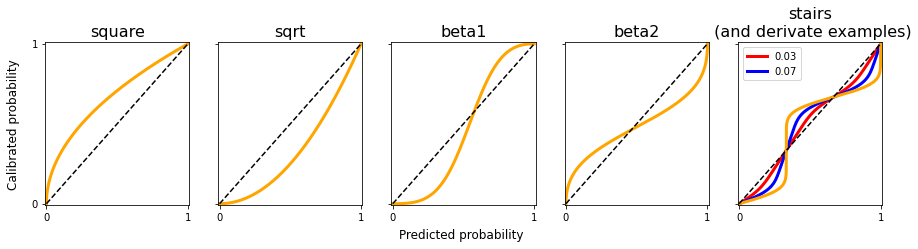

In [3]:
fig, ax = plt.subplots(figsize=(15,3), nrows=1, ncols=5, sharey=True)

x = np.arange(0, 1.001, 0.001)

for j,column in enumerate(ax):
    cf = calibration_functions[j]
    column.set_title(cf.__name__, fontsize=16)
    column.plot(cf(x), x, c="orange",lw=3)
    column.set_ylim(-0.01,1.01)
    column.set_xlim(-0.01,1.01)
    column.plot([0,1],[0,1],"--",c="black")
    column.set_xticks([0,1]) 
    column.set_yticks([0,1]) 
    
    
beta_dist = [1, 1]
all_calibration_errors = [(i, np.abs) for i in np.arange(0.0, 0.1001, 0.005)]
derivates = find_all_derivates_for_calibration_functions([stairs], [(0.03, np.abs), (0.07, np.abs)], beta_alpha=beta_dist[0], beta_beta=beta_dist[1])
colors = ["red", "blue", "orange"]
c_i = 0
for name, cf, error, error_fun in derivates["stairs"]:
    if error in [0.03, 0.07]:
        ax[4].plot(cf(x), x, label=str(error).ljust(4, "0"), c=colors[c_i], lw=3, zorder=1)
        c_i += 1
    ax[4].legend()
    ax[4].set_title(f"{stairs.__name__}\n (and derivate examples)", fontsize=16)

fig.text(0.51, -0.03, 'Predicted probability', ha='center', size=12)
fig.text(0.09, 0.5, 'Calibrated probability', va='center', rotation='vertical', size=12)
plt.savefig("fig/calmap_base.pdf", dpi=250, bbox_inches="tight")
plt.show()

## Rel diags

In [4]:
n_data = 10000
dist = [1,1]
data_seed = 0
expected_calibration_error = 0.10

derivates = find_all_derivates_for_calibration_functions(calibration_functions, 
                                                         [(expected_calibration_error, np.abs)], 
                                                         beta_alpha=dist[0], beta_beta=dist[1])

df_all = get_syn()

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Using equal size with Borders: [9.285325827503382e-05, 0.19709543199713042, 0.5269140574866336, 0.9999514838436319]


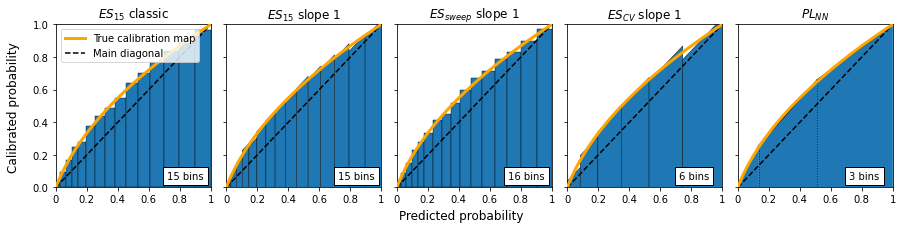

Using equal size with Borders: [0.00923272686481203, 0.34733921154028663, 0.5389168868444835, 0.7027399247623554, 0.8532159425357396, 0.9999787738144077]


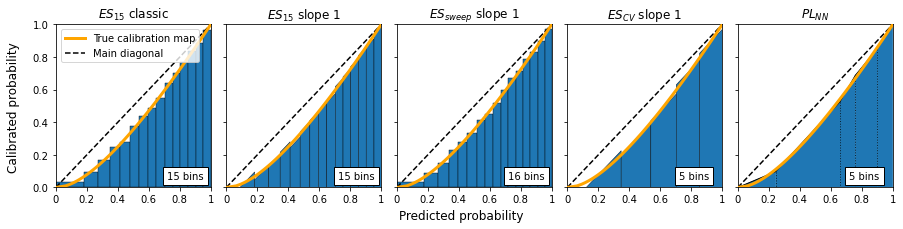

C:\Users\Kaspar\OneDrive\Jagatud kool\ECE artikkel\new_syn_experiments\calibration_functions.py:36: RuntimeWarning: divide by zero encountered in true_divide
  return 1 / (1 + 1 / (np.exp(c) * (x**a / (1-x)**b) ) )
C:\Users\Kaspar\OneDrive\Jagatud kool\ECE artikkel\new_syn_experiments\calibration_functions.py:36: RuntimeWarning: divide by zero encountered in true_divide
  return 1 / (1 + 1 / (np.exp(c) * (x**a / (1-x)**b) ) )
C:\Users\Kaspar\OneDrive\Jagatud kool\ECE artikkel\new_syn_experiments\calibration_functions.py:36: RuntimeWarning: divide by zero encountered in true_divide
  return 1 / (1 + 1 / (np.exp(c) * (x**a / (1-x)**b) ) )
C:\Users\Kaspar\OneDrive\Jagatud kool\ECE artikkel\new_syn_experiments\calibration_functions.py:36: RuntimeWarning: divide by zero encountered in true_divide
  return 1 / (1 + 1 / (np.exp(c) * (x**a / (1-x)**b) ) )
C:\Users\Kaspar\OneDrive\Jagatud kool\ECE artikkel\new_syn_experiments\calibration_functions.py:36: RuntimeWarning: divide by zero encounter

Using equal size with Borders: [0.03233769060829886, 0.4451322431138321, 0.6207572401225168, 0.9933161185423084]


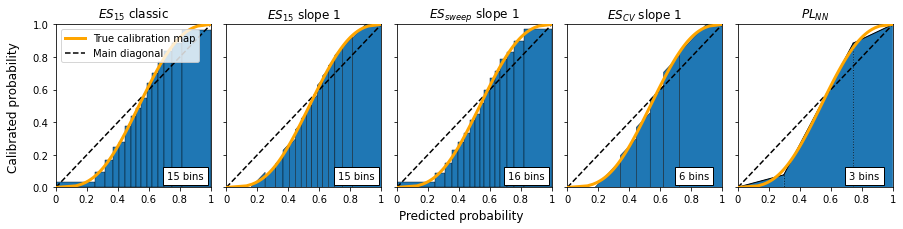

C:\Users\Kaspar\OneDrive\Jagatud kool\ECE artikkel\new_syn_experiments\calibration_functions.py:45: RuntimeWarning: divide by zero encountered in true_divide
  return 1 / (1 + 1 / (np.exp(c) * (x**a / (1-x)**b) ) )
C:\Users\Kaspar\OneDrive\Jagatud kool\ECE artikkel\new_syn_experiments\calibration_functions.py:45: RuntimeWarning: divide by zero encountered in true_divide
  return 1 / (1 + 1 / (np.exp(c) * (x**a / (1-x)**b) ) )
C:\Users\Kaspar\OneDrive\Jagatud kool\ECE artikkel\new_syn_experiments\calibration_functions.py:45: RuntimeWarning: divide by zero encountered in true_divide
  return 1 / (1 + 1 / (np.exp(c) * (x**a / (1-x)**b) ) )
C:\Users\Kaspar\OneDrive\Jagatud kool\ECE artikkel\new_syn_experiments\calibration_functions.py:45: RuntimeWarning: divide by zero encountered in true_divide
  return 1 / (1 + 1 / (np.exp(c) * (x**a / (1-x)**b) ) )
C:\Users\Kaspar\OneDrive\Jagatud kool\ECE artikkel\new_syn_experiments\calibration_functions.py:45: RuntimeWarning: divide by zero encounter

Using equal size with Borders: [7.459389115214437e-06, 0.10900500596265643, 0.53667839421288, 0.9145891658650317, 0.9999990321644795]


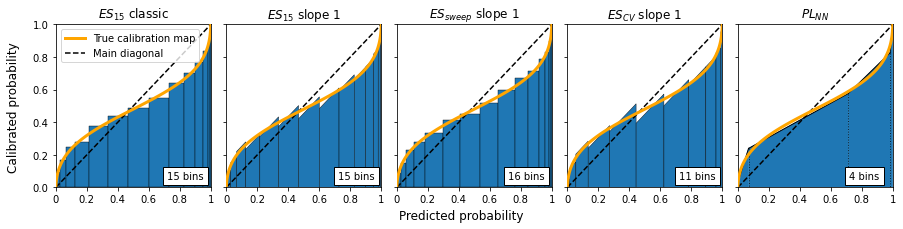

Using equal size with Borders: [0.0008425067207048493, 0.3018387020500853, 0.32714525485238904, 0.3449596414046505, 0.40027336537800057, 0.8090663750359345, 0.9810551182246106, 0.999996267241108]


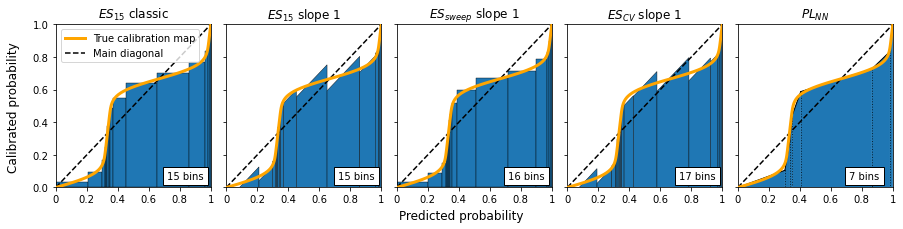

In [5]:
for calibration_function in calibration_functions:
    
    # Data generation
    _, cf, _, _ = derivates[calibration_function.__name__][0]
    p,y,c = generate_data(dirichlet=dist, n_data=n_data, calibration_function=cf, seed=data_seed)
    x_range = np.arange(0.0, 1.01, 0.01)
    
    # n_bins for PL_NN
    df_sel = df_all[(df_all.distribution == "uniform")
              &(df_all.expected_calibration_error == expected_calibration_error)
              &(df_all.seed == data_seed)
              &(df_all.calibration_function == calibration_function.__name__)
              &(df_all.n_data == n_data)]
    n_bins_pl = int(df_sel[(df_sel.binning == "$PL_{NN}$")].n_bins.iloc[0])
    n_bins_es = int(df_sel[(df_sel.binning == "$ES_{CV}$")].n_bins.iloc[0])

    # Figure setup
    fig, ax = plt.subplots(figsize=(15,3), nrows=1, ncols=5, sharey=True)
    plt.subplots_adjust(wspace=0.1)    
    fig.text(0.5, -0.02, "Predicted probability", fontsize=12, ha='center')
    fig.text(0.08, 0.5, "Calibrated probability", fontsize=12, va='center', rotation='vertical')
    
    # Axis setup
    for ax_id, axis in enumerate(ax):
        axis.plot(cf(x_range), x_range, c="orange", label="True calibration map", zorder=4, lw=3)
        axis.plot([0,1], [0,1], "--", c="black", label="Main diagonal", zorder=2)
        axis.set_xlim(0,1)
        axis.set_ylim(0,1)
        axis.set_xticks([0, 0.2, 0.4, 0.6, 0.8, 1])
        axis.set_xticklabels([0, 0.2, 0.4, 0.6, 0.8, 1])
        
    ###
    
    # Axis 0
    binning = EqualSizeBinning(p,y,c,15)    
    polygons = binning.construct_plt_polygons_flat()    
    for polygon in polygons:
        polygon.set_alpha(1)
        ax[0].add_line(polygon)
        
    ax[0].set_title("$ES_{15}$ classic")  
    t = ax[0].text(0.72, 0.05, f'{15} bins', fontsize=10)
    t.set_bbox(dict(facecolor='white', alpha=1, edgecolor='black'))
    
    # Axis 1
    polygons = binning.construct_plt_polygons_slope_1()    
    for polygon in polygons:
        polygon.set_alpha(1)
        ax[1].add_line(polygon)
        
    ax[1].set_title("$ES_{15}$ slope 1")   
    t = ax[1].text(0.72, 0.05, f'{15} bins', fontsize=10)
    t.set_bbox(dict(facecolor='white', alpha=1, edgecolor='black'))
        
    # Axis 2
    binning = MonotonicEqualSizeBinning(p,y,c)      
    polygons = binning.construct_plt_polygons_flat()    
    for polygon in polygons:
        polygon.set_alpha(1)
        ax[2].add_line(polygon)
        
    ax[2].set_title("$ES_{sweep}$ slope 1") 
    t = ax[2].text(0.72, 0.05, f'{binning.n_bins} bins', fontsize=10)
    t.set_bbox(dict(facecolor='white', alpha=1, edgecolor='black'))

    # Axis 3
    binning = EqualSizeBinning(p,y,c,n_bins_es)    
    polygons = binning.construct_plt_polygons_slope_1()   
    for polygon in polygons:
        polygon.set_alpha(1)
        ax[3].add_line(polygon)
        
    ax[3].set_title("$ES_{CV}$ slope 1")  
    t = ax[3].text(0.72, 0.05, f'{n_bins_es} bins', fontsize=10)
    t.set_bbox(dict(facecolor='white', alpha=1, edgecolor='black'))
    
    # Axis 4
    n_nodes = int(n_bins_pl - 1)
    model = Piecewise_NN4(k=n_nodes, max_epochs=1500, random_state=0, equal_size=True, monotonic=False,
                      use_ce_loss=False, logit_scale=False, logistic_out=False, lr=0.01, patience=20)
    h = model.fit(p, y, verbose=False, batch_size=min(n_data // 4, 512))
    c_hat_pl = model.predict(p)

    # polygons
    w = model.model.get_weights()   
    x_nodes = np.cumsum(softmax(w[0]))
    x_nodes = np.concatenate([[0], x_nodes[:-1], [1]])
    y_nodes = sigmoid(w[-1])
    polygons = []    
    for i in range(len(x_nodes)-1):
        polygon = plt.Polygon([[x_nodes[i],0],
                                [x_nodes[i+1],0],
                                [x_nodes[i+1], y_nodes[i+1]],
                                [x_nodes[i], y_nodes[i]]],
                                edgecolor="black", lw=0.4, alpha=1.0)
        polygons.append(polygon)   

    def plot_polygons(axis, polygons):
        for i in range(len(polygons)):
            polygon = copy(polygons[i])
            polygon.set_color("C0")
            polygon.set_alpha(1)
            axis.add_line(polygon)    

    plot_polygons(ax[4], polygons)   
    
    # fitted line
    for i in range(len(x_nodes)-1):
        ax[4].plot([x_nodes[i], x_nodes[i+1]], [y_nodes[i], y_nodes[i+1]], c="black", lw=1, zorder=3)   
    # dotted lines
    for i in range(len(x_nodes)):
        ax[4].plot([x_nodes[i], x_nodes[i]], [y_nodes[i], 0], ":", c="black", zorder=3, alpha=0.7, lw=1)
        
    ax[4].set_title("$PL_{NN}$") 
    t = ax[4].text(0.72, 0.05, f'{n_bins_pl} bins', fontsize=10)
    t.set_bbox(dict(facecolor='white', alpha=1, edgecolor='black'))
    
    ###
    ax[0].legend(loc="upper left")
    plt.savefig(f"fig/{calibration_function.__name__}_ndata{n_data}_s{data_seed}_ce{expected_calibration_error}_uniform.pdf", dpi=250, bbox_inches="tight")
    plt.show()

# Syn data tables

In [5]:
import numpy as np
import pandas as pd
from scipy import stats

pd.set_option('display.max_rows', 500)
%load_ext autoreload
%autoreload 2

In [6]:
def correlation_finder(grp):
    d = {}
    d["spearman"] = stats.spearmanr(grp["c_hat_distance_p_debiased"], grp["p_distance_c"])[0]
    d["pearson"] = stats.pearsonr(grp["c_hat_distance_p_debiased"], grp["p_distance_c"])[0]
    return pd.Series(d, index=["spearman", "pearson"])

In [14]:
df_all = get_syn()

In [15]:
df_all

,n_folds,binning,n_bins,c_hat_distance_p,c_hat_distance_p_debiased,c_hat_distance_p_square,c_hat_distance_p_square_debiased,c_hat_distance_c,c_hat_distance_c_square,test_c_hat_distance_p,...,test_c_hat_distance_c_square,expected_calibration_error,p_distance_c,p_distance_c_square,seed,calibration_function,n_data,distribution,ECE_diff_abs,ECE_diff_sq
0,10.0,$PL_{NN}^{MSE}-trick$,2.0,0.007426,0.007426,0.000112,0.000112,0.004500,0.000062,0.007519,...,0.000061,0.005,0.004924,0.000053,0,beta1,10000,beta,0.002502,0.000059
1,10.0,$PL_{NN}^{MSE}$,2.0,0.007488,0.007488,0.000127,0.000127,0.004819,0.000075,0.007548,...,0.000074,0.005,0.004924,0.000053,0,beta1,10000,beta,0.002564,0.000074
1,10.0,$PL_{NN}^{CE}$,2.0,0.005836,0.005836,0.000081,0.000081,0.003248,0.000041,0.005889,...,0.000041,0.005,0.004924,0.000053,0,beta1,10000,beta,0.000911,0.000028
1,10.0,$PL3^{MSE}$,3.0,0.007324,0.007324,0.000136,0.000136,0.004367,0.000101,0.007353,...,0.000099,0.005,0.004924,0.000053,0,beta1,10000,beta,0.002400,0.000083
0,10.0,$PL3^{CE}-trick$,2.0,0.007474,0.007474,0.000159,0.000159,0.004793,0.000091,0.007524,...,0.000091,0.005,0.004924,0.000053,0,beta1,10000,beta,0.002549,0.000106
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0,9999.0,KCE,9999.0,9999.000000,9999.000000,0.000190,0.000155,9999.000000,9999.000000,9999.000000,...,9999.000000,0.010,0.009545,0.000372,4,stairs,1000,beta,9998.990455,0.000217
0,9999.0,KCE,9999.0,9999.000000,9999.000000,0.000250,0.000216,9999.000000,9999.000000,9999.000000,...,9999.000000,0.015,0.014318,0.000837,4,stairs,1000,beta,9998.985682,0.000621
0,9999.0,KCE,9999.0,9999.000000,9999.000000,0.000320,0.000285,9999.000000,9999.000000,9999.000000,...,9999.000000,0.020,0.019090,0.001487,4,stairs,1000,beta,9998.980910,0.001202
0,9999.0,KCE,9999.0,9999.000000,9999.000000,0.000400,0.000365,9999.000000,9999.000000,9999.000000,...,9999.000000,0.025,0.023863,0.002324,4,stairs,1000,beta,9998.976137,0.001959


In [27]:
def add_datarow(df_sel, df, metric):
    df_row = (df_sel
              .groupby(["binning"]).mean()
              [[metric]].T)
    df_row = np.round(df_row*1000, 2)
    df = pd.concat([df, df_row])
    return df

def add_rankrow(df_sel, ranks, metric):
    rank_row = (df_sel
                .groupby(["binning"]).mean()
                .rank()
                [[metric]].T)
    ranks = pd.concat([ranks, rank_row])
    return ranks

def add_correlations_datarow(df_sel, df, correlations_data):    
    df_row = (correlations_data
             .groupby(["binning"]).mean()
             [["spearman"]].T)
    df_row = np.round(df_row, 4)
    df = pd.concat([df, df_row])
    return df

def add_correlations_rankrow(df_sel, ranks, correlations_data):
    rank_row = (correlations_data
                .groupby(["binning"]).mean()
                .rank(ascending=False)
                [["spearman"]].T)
    ranks = pd.concat([ranks, rank_row])
    return ranks

In [43]:
def syn_table(fname, metric="spearman", 
              binning = ['$ES_{15}$', '$ES_{sweep}$', '$ES_{CV}$', '$PL3^{CE}$', "$PL3^{MSE}$",  
                         '$PL_{NN}^{CE}$', '$PL_{NN}^{MSE}$', '$PL_{DE}$', 'Platt', 'beta', 'isotonic']):

    cf_groups = [["square"], ["sqrt"], ["beta1"], ["beta2"], ["stairs"]]
    
    df = pd.DataFrame()
    ranks = pd.DataFrame()

    for distribution in ["uniform"]:
        for cf_group in cf_groups:
            df_sel = df_all[(df_all.calibration_function.isin(cf_group))
                           &(df_all.distribution == distribution)
                           &(df_all.binning.isin(binning))]

            if metric == "spearman":
                correlations_data = (df_sel.groupby(["seed", "n_data", "binning"])
                     .apply(correlation_finder)
                     .reset_index()
                    )
                df = add_correlations_datarow(df_sel, df, correlations_data)
                ranks = add_correlations_rankrow(df_sel, ranks, correlations_data)
            else:
                df = add_datarow(df_sel, df, metric)
                ranks = add_rankrow(df_sel, ranks, metric)
                
    #return df
                
    # Combine ranks and data
    for row_idx in range(len(df)):
        for column_idx in range(len(df.iloc[row_idx])):

            item = df.iloc[row_idx, column_idx]
            rank = ranks.iloc[row_idx, column_idx]

            df.iloc[row_idx, column_idx] = str(item) + "_{" + str(int(rank)) + "}"
            if rank == 1:
                df.iloc[row_idx, column_idx] = "\mathbf{" + df.iloc[row_idx, column_idx] + "}"
            df.iloc[row_idx, column_idx] = "$" + df.iloc[row_idx, column_idx] + "$"

    df.index=np.concatenate(cf_groups)
    
    avg_ranks = ranks.mean().values
    avg_ranks = ["$%0.1f$" % rnk for rnk in avg_ranks]
    df = pd.concat([df, pd.DataFrame([avg_ranks], index=["avg rank"], columns=df.columns)])
    
    #return df
    
    df = df[binning]

    display(df)
    
    capt_str = fname.split(".")[0]
    begin_list = ["\\begin{table}","\\caption{%s}" % capt_str,   "\\label{table:%s}" % capt_str, "\\centering", "\\begin{adjustbox}{width=0.8\\textwidth}"]
    hline_str = "\\hline"
    end_list = ["\\end{adjustbox}", "\\end{table}"]

    with pd.option_context("max_colwidth", 25):
        with open(f'tables/{fname}','w') as tf:
            output = df.to_latex(escape=False)
            splitted = output.split("\n")
            output_new = "\n".join(np.concatenate([begin_list, splitted[:-4], [hline_str], splitted[-4:-1], end_list]))
            tf.write(output_new)
            print(output_new)

In [44]:
syn_table("syn_uniform_calmap.tex", metric="test_c_hat_distance_c")
syn_table("syn_uniform_ece.tex", metric="ECE_diff_abs")

binning,$ES_{15}$,$ES_{sweep}$,$ES_{CV}$,$PL3^{CE}$,$PL3^{MSE}$,$PL_{NN}^{CE}$,$PL_{NN}^{MSE}$,$PL_{DE}$,Platt,beta,isotonic
square,$24.76_{10}$,$20.46_{9}$,$17.33_{8}$,$9.98_{2}$,$10.98_{3}$,$13.07_{6}$,$12.78_{5}$,$14.88_{7}$,$\mathbf{9.48_{1}}$,$11.04_{4}$,$25.45_{11}$
sqrt,$24.78_{10}$,$20.43_{9}$,$16.87_{8}$,$13.29_{4}$,$14.44_{7}$,$13.43_{5}$,$14.06_{6}$,$13.04_{3}$,$11.82_{2}$,$\mathbf{11.18_{1}}$,$25.45_{11}$
beta1,$25.3_{10}$,$20.98_{9}$,$18.96_{8}$,$14.76_{4}$,$15.27_{5}$,$16.87_{6}$,$17.55_{7}$,$13.69_{3}$,$\mathbf{11.32_{1}}$,$12.49_{2}$,$25.45_{11}$
beta2,$25.54_{11}$,$21.52_{8}$,$21.58_{9}$,$14.51_{4}$,$14.41_{3}$,$15.26_{5}$,$15.31_{6}$,$18.49_{7}$,$\mathbf{12.87_{1}}$,$14.33_{2}$,$25.45_{10}$
stairs,$26.79_{9}$,$23.24_{6}$,$23.55_{7}$,$18.72_{3}$,$19.32_{4}$,$\mathbf{17.89_{1}}$,$17.95_{2}$,$20.09_{5}$,$50.44_{11}$,$36.14_{10}$,$25.45_{8}$
avg rank,$10.0$,$8.2$,$8.0$,$3.4$,$4.4$,$4.6$,$5.2$,$5.0$,$3.2$,$3.8$,$10.2$


\begin{table}
\caption{syn_uniform_calmap}
\label{table:syn_uniform_calmap}
\centering
\begin{adjustbox}{width=0.8\textwidth}
\begin{tabular}{llllllllllll}
\toprule
binning &     $ES_{15}$ & $ES_{sweep}$ &    $ES_{CV}$ &   $PL3^{CE}$ &  $PL3^{MSE}$ &        $PL_{NN}^{CE}$ & $PL_{NN}^{MSE}$ &    $PL_{DE}$ &                 Platt &                  beta &      isotonic \\
\midrule
square   &  $24.76_{10}$ &  $20.46_{9}$ &  $17.33_{8}$ &   $9.98_{2}$ &  $10.98_{3}$ &           $13.07_{6}$ &     $12.78_{5}$ &  $14.88_{7}$ &   $\mathbf{9.48_{1}}$ &           $11.04_{4}$ &  $25.45_{11}$ \\
sqrt     &  $24.78_{10}$ &  $20.43_{9}$ &  $16.87_{8}$ &  $13.29_{4}$ &  $14.44_{7}$ &           $13.43_{5}$ &     $14.06_{6}$ &  $13.04_{3}$ &           $11.82_{2}$ &  $\mathbf{11.18_{1}}$ &  $25.45_{11}$ \\
beta1    &   $25.3_{10}$ &  $20.98_{9}$ &  $18.96_{8}$ &  $14.76_{4}$ &  $15.27_{5}$ &           $16.87_{6}$ &     $17.55_{7}$ &  $13.69_{3}$ &  $\mathbf{11.32_{1}}$ &           $12.49_{2}$ &  $25.45_

binning,$ES_{15}$,$ES_{sweep}$,$ES_{CV}$,$PL3^{CE}$,$PL3^{MSE}$,$PL_{NN}^{CE}$,$PL_{NN}^{MSE}$,$PL_{DE}$,Platt,beta,isotonic
square,$7.4_{10}$,$7.07_{9}$,$6.59_{6}$,$5.91_{4}$,$6.31_{5}$,$7.01_{8}$,$6.98_{7}$,$5.84_{3}$,$\mathbf{5.79_{1}}$,$5.81_{2}$,$8.66_{11}$
sqrt,$6.94_{9}$,$6.56_{8}$,$\mathbf{5.92_{1}}$,$6.37_{4}$,$6.39_{5}$,$7.12_{10}$,$6.49_{7}$,$6.21_{2}$,$6.34_{3}$,$6.49_{6}$,$9.6_{11}$
beta1,$7.78_{10}$,$7.19_{7}$,$7.11_{6}$,$7.72_{9}$,$6.83_{3}$,$7.46_{8}$,$6.96_{5}$,$\mathbf{5.79_{1}}$,$6.76_{2}$,$6.95_{4}$,$10.38_{11}$
beta2,$7.18_{2}$,$8.04_{8}$,$8.1_{9}$,$8.34_{10}$,$7.52_{4}$,$7.75_{5}$,$7.23_{3}$,$\mathbf{6.88_{1}}$,$7.83_{6}$,$7.97_{7}$,$9.13_{11}$
stairs,$\mathbf{7.12_{1}}$,$7.46_{4}$,$7.29_{2}$,$7.59_{7}$,$7.58_{6}$,$8.11_{8}$,$7.32_{3}$,$7.47_{5}$,$29.27_{11}$,$24.98_{10}$,$10.3_{9}$
avg rank,$6.4$,$7.2$,$4.8$,$6.8$,$4.6$,$7.8$,$5.0$,$2.4$,$4.6$,$5.8$,$10.6$


\begin{table}
\caption{syn_uniform_ece}
\label{table:syn_uniform_ece}
\centering
\begin{adjustbox}{width=0.8\textwidth}
\begin{tabular}{llllllllllll}
\toprule
binning &            $ES_{15}$ & $ES_{sweep}$ &            $ES_{CV}$ &   $PL3^{CE}$ & $PL3^{MSE}$ & $PL_{NN}^{CE}$ & $PL_{NN}^{MSE}$ &            $PL_{DE}$ &                Platt &          beta &      isotonic \\
\midrule
square   &           $7.4_{10}$ &   $7.07_{9}$ &           $6.59_{6}$ &   $5.91_{4}$ &  $6.31_{5}$ &     $7.01_{8}$ &      $6.98_{7}$ &           $5.84_{3}$ &  $\mathbf{5.79_{1}}$ &    $5.81_{2}$ &   $8.66_{11}$ \\
sqrt     &           $6.94_{9}$ &   $6.56_{8}$ &  $\mathbf{5.92_{1}}$ &   $6.37_{4}$ &  $6.39_{5}$ &    $7.12_{10}$ &      $6.49_{7}$ &           $6.21_{2}$ &           $6.34_{3}$ &    $6.49_{6}$ &    $9.6_{11}$ \\
beta1    &          $7.78_{10}$ &   $7.19_{7}$ &           $7.11_{6}$ &   $7.72_{9}$ &  $6.83_{3}$ &     $7.46_{8}$ &      $6.96_{5}$ &  $\mathbf{5.79_{1}}$ &           $6.76_{2}$ &    $6.

In [45]:
binning2 = ['$ES_{15}$', '$ES_{sweep}$', '$ES_{CV}$', 'KCE', '$PL3^{CE}$', "$PL3^{MSE}$",  '$PL_{NN}^{CE}$', '$PL_{NN}^{MSE}$', '$PL_{DE}$', 'Platt', 'beta', 'isotonic']
syn_table("syn_uniform_ece_sq.tex", metric="ECE_diff_sq", binning = binning2)

binning,$ES_{15}$,$ES_{sweep}$,$ES_{CV}$,KCE,$PL3^{CE}$,$PL3^{MSE}$,$PL_{NN}^{CE}$,$PL_{NN}^{MSE}$,$PL_{DE}$,Platt,beta,isotonic
square,$0.91_{9}$,$0.97_{10}$,$0.81_{7}$,$1.62_{12}$,$\mathbf{0.69_{1}}$,$0.77_{4}$,$0.81_{5}$,$0.81_{6}$,$0.83_{8}$,$0.7_{2}$,$0.74_{3}$,$1.17_{11}$
sqrt,$0.81_{6}$,$0.77_{3}$,$0.76_{2}$,$1.56_{12}$,$0.85_{8}$,$\mathbf{0.74_{1}}$,$0.91_{10}$,$0.79_{5}$,$0.78_{4}$,$0.89_{9}$,$0.85_{7}$,$1.39_{11}$
beta1,$0.9_{7}$,$0.92_{8}$,$0.8_{2}$,$4.0_{12}$,$0.97_{10}$,$0.81_{3}$,$0.94_{9}$,$0.82_{4}$,$\mathbf{0.74_{1}}$,$0.85_{5}$,$0.88_{6}$,$1.41_{11}$
beta2,$1.03_{5}$,$1.07_{9}$,$0.96_{2}$,$3.93_{12}$,$1.15_{10}$,$1.06_{7}$,$1.0_{3}$,$1.02_{4}$,$\mathbf{0.9_{1}}$,$1.06_{6}$,$1.06_{8}$,$1.23_{11}$
stairs,$0.9_{2}$,$0.91_{3}$,$\mathbf{0.88_{1}}$,$4.11_{12}$,$1.02_{7}$,$0.93_{4}$,$1.06_{8}$,$1.0_{6}$,$0.99_{5}$,$3.31_{11}$,$3.11_{10}$,$1.41_{9}$
avg rank,$5.8$,$6.6$,$2.8$,$12.0$,$7.2$,$3.8$,$7.0$,$5.0$,$3.8$,$6.6$,$6.8$,$10.6$


\begin{table}
\caption{syn_uniform_ece_sq}
\label{table:syn_uniform_ece_sq}
\centering
\begin{adjustbox}{width=0.8\textwidth}
\begin{tabular}{lllllllllllll}
\toprule
binning &   $ES_{15}$ & $ES_{sweep}$ &            $ES_{CV}$ &          KCE &           $PL3^{CE}$ &          $PL3^{MSE}$ & $PL_{NN}^{CE}$ & $PL_{NN}^{MSE}$ &            $PL_{DE}$ &        Platt &         beta &     isotonic \\
\midrule
square   &  $0.91_{9}$ &  $0.97_{10}$ &           $0.81_{7}$ &  $1.62_{12}$ &  $\mathbf{0.69_{1}}$ &           $0.77_{4}$ &     $0.81_{5}$ &      $0.81_{6}$ &           $0.83_{8}$ &    $0.7_{2}$ &   $0.74_{3}$ &  $1.17_{11}$ \\
sqrt     &  $0.81_{6}$ &   $0.77_{3}$ &           $0.76_{2}$ &  $1.56_{12}$ &           $0.85_{8}$ &  $\mathbf{0.74_{1}}$ &    $0.91_{10}$ &      $0.79_{5}$ &           $0.78_{4}$ &   $0.89_{9}$ &   $0.85_{7}$ &  $1.39_{11}$ \\
beta1    &   $0.9_{7}$ &   $0.92_{8}$ &            $0.8_{2}$ &   $4.0_{12}$ &          $0.97_{10}$ &           $0.81_{3}$ &     $0.94_{9}$ &  

In [46]:
syn_table("syn_uniform_spearman.tex", metric="spearman")

binning,$ES_{15}$,$ES_{sweep}$,$ES_{CV}$,$PL3^{CE}$,$PL3^{MSE}$,$PL_{NN}^{CE}$,$PL_{NN}^{MSE}$,$PL_{DE}$,Platt,beta,isotonic
square,$0.9965_{2}$,$0.9898_{10}$,$0.9811_{11}$,$0.9952_{6}$,$0.9965_{2}$,$0.9919_{9}$,$0.9954_{4}$,$0.9948_{8}$,$0.9954_{4}$,$0.9952_{7}$,$\mathbf{0.9965_{1}}$
sqrt,$0.9877_{10}$,$\mathbf{0.9937_{1}}$,$0.984_{11}$,$0.9931_{2}$,$0.9921_{3}$,$0.9878_{9}$,$0.9893_{8}$,$0.9916_{5}$,$0.9919_{4}$,$0.9913_{6}$,$0.9894_{7}$
beta1,$0.9956_{3}$,$0.995_{4}$,$0.9919_{7}$,$0.9842_{8}$,$0.9702_{9}$,$0.9601_{11}$,$0.964_{10}$,$0.9945_{5}$,$0.9945_{6}$,$\mathbf{0.9974_{1}}$,$0.9961_{2}$
beta2,$0.9971_{7}$,$0.9942_{11}$,$0.9979_{5}$,$0.9984_{4}$,$\mathbf{0.9999_{1}}$,$0.9987_{3}$,$0.9996_{2}$,$0.9956_{9}$,$0.9971_{6}$,$0.9958_{8}$,$0.9942_{10}$
stairs,$\mathbf{0.9965_{1}}$,$0.9956_{2}$,$0.9895_{6}$,$0.9888_{8}$,$0.989_{7}$,$0.9887_{9}$,$0.9926_{5}$,$0.9946_{3}$,$0.9549_{11}$,$0.9777_{10}$,$0.9939_{4}$
avg rank,$4.7$,$5.6$,$8.0$,$5.6$,$4.5$,$8.2$,$5.9$,$6.0$,$6.3$,$6.4$,$4.8$


\begin{table}
\caption{syn_uniform_spearman}
\label{table:syn_uniform_spearman}
\centering
\begin{adjustbox}{width=0.8\textwidth}
\begin{tabular}{llllllllllll}
\toprule
binning &              $ES_{15}$ &           $ES_{sweep}$ &      $ES_{CV}$ &    $PL3^{CE}$ &            $PL3^{MSE}$ & $PL_{NN}^{CE}$ & $PL_{NN}^{MSE}$ &     $PL_{DE}$ &          Platt &                   beta &               isotonic \\
\midrule
square   &           $0.9965_{2}$ &          $0.9898_{10}$ &  $0.9811_{11}$ &  $0.9952_{6}$ &           $0.9965_{2}$ &   $0.9919_{9}$ &    $0.9954_{4}$ &  $0.9948_{8}$ &   $0.9954_{4}$ &           $0.9952_{7}$ &  $\mathbf{0.9965_{1}}$ \\
sqrt     &          $0.9877_{10}$ &  $\mathbf{0.9937_{1}}$ &   $0.984_{11}$ &  $0.9931_{2}$ &           $0.9921_{3}$ &   $0.9878_{9}$ &    $0.9893_{8}$ &  $0.9916_{5}$ &   $0.9919_{4}$ &           $0.9913_{6}$ &           $0.9894_{7}$ \\
beta1    &           $0.9956_{3}$ &            $0.995_{4}$ &   $0.9919_{7}$ &  $0.9842_{8}$ &           $0.97